<a href="https://colab.research.google.com/github/Hoangthang017/AI-TEMPO-StrokePrediction/blob/main/model/%5BAITempoRun%5DBaseline.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# BaseLine cơ bản cho cuộc thi
Một cái *bây lai* theo hướng tiếp cận nhẹ nhàng tình cảm, sử dụng mô hình SVM. Bắt đầu thôi 😉.

### Mổ xẻ Dataset

#### Load Data

In [14]:
# Import một số thư viện cần thiết
import pandas as pd


# B1: Load data
# Load data từ link google drive
def load_from_google(url):
  # Lấy id của file
  id = url.split('/')[-2]
  # Tạo link downloads:
  download_url = 'https://drive.google.com/uc?id=' + id
  # Load file từ link downloads
  data = pd.read_csv(download_url)
  return data

# Thay link của data zô đây
train_url = 'https://drive.google.com/file/d/1XQvqilSJNvWRMUptg7zbyZvryZF95gyo/view?usp=sharing'
# Load data train từ link
train = load_from_google(train_url)
# Show hàng 5 giá trị đầu
train.head(5)

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,blood,height,stroke
0,77,Female,NaN,0.0,0.0,No,children,Unknown,85.81,18.6,Unknown,O,NaN,0
1,84,Male,55.0,0.0,0.0,Yes,Private,Urban,89.17,NaN,never smoked,B,1.59,0
2,91,Female,42.0,0.0,0.0,No,Private,Unknown,98.53,18.5,never smoked,B,NaN,0
3,99,Female,31.0,0.0,0.0,No,Private,Urban,108.89,52.3,Unknown,O,1.24,0
4,121,Female,38.0,0.0,0.0,Yes,Private,Unknown,91.44,NaN,Unknown,O,NaN,0


In [15]:
# Load data test từ link google drive
test_url = 'https://drive.google.com/file/d/12eC_nBt7W0hF_HmFxoXw3SL0d7oLkQqJ/view?usp=sharing'
test = load_from_google(test_url)
test = pd.DataFrame(test,columns=test.columns)
test.head(5)

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,blood,height
0,67,Female,17.0,0.0,0.0,No,Private,Urban,92.97,NaN,formerly smoked,AB,NaN
1,210,Male,81.0,0.0,0.0,Yes,Self-employed,Rural,91.54,31.4,never smoked,A,1.60
2,242,Male,4.0,NaN,0.0,No,children,Urban,98.56,17.5,Unknown,O,NaN
3,711,Male,81.0,0.0,NaN,Yes,Private,Rural,92.96,22.2,never smoked,AB,NaN
4,724,Male,17.0,0.0,0.0,No,Private,Rural,81.77,44.7,never smoked,O,1.34


#### Xem thông tin của tập train

In [16]:
# Xem kích thước data
train.shape

(4000, 14)

In [17]:
# Check info data 
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4000 entries, 0 to 3999
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 4000 non-null   int64  
 1   gender             4000 non-null   object 
 2   age                3893 non-null   float64
 3   hypertension       3770 non-null   float64
 4   heart_disease      3910 non-null   float64
 5   ever_married       4000 non-null   object 
 6   work_type          4000 non-null   object 
 7   Residence_type     4000 non-null   object 
 8   avg_glucose_level  3829 non-null   float64
 9   bmi                2884 non-null   float64
 10  smoking_status     4000 non-null   object 
 11  blood              3990 non-null   object 
 12  height             2928 non-null   float64
 13  stroke             4000 non-null   int64  
dtypes: float64(6), int64(2), object(6)
memory usage: 437.6+ KB


**Nhận xét**: Có một số cột chứa giá trị null, một số thì có kiểu dữ liệu object. 

**Giải quyết**: Vì đây là một baseline đơn giản và ngây ngô nên mình sẽ bỏ những **cột** có kiểu dữ liệu object và bỏ đi những **hàng** có giá trị null.

In [18]:
# Thống kê một số giá trị của data
train.describe().T

,count,mean,std,min,25%,50%,75%,max
id,4000.0,36294.336250,21213.704061,77.00,17294.00,36688.50,54425.0000,72918.00
age,3893.0,43.071256,22.425944,0.08,25.00,45.00,61.0000,82.00
hypertension,3770.0,0.097613,0.296830,0.00,0.00,0.00,0.0000,1.00
heart_disease,3910.0,0.055243,0.228483,0.00,0.00,0.00,0.0000,1.00
avg_glucose_level,3829.0,106.178062,45.048667,55.22,77.50,92.11,114.0900,267.76
bmi,2884.0,28.887899,7.904179,11.30,23.50,28.00,33.0000,97.60
height,2928.0,1.611831,0.149053,0.91,1.52,1.63,1.7225,1.85
stroke,4000.0,0.032500,0.177346,0.00,0.00,0.00,0.0000,1.00


#### Biểu đồ thống kê Dataset


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function 

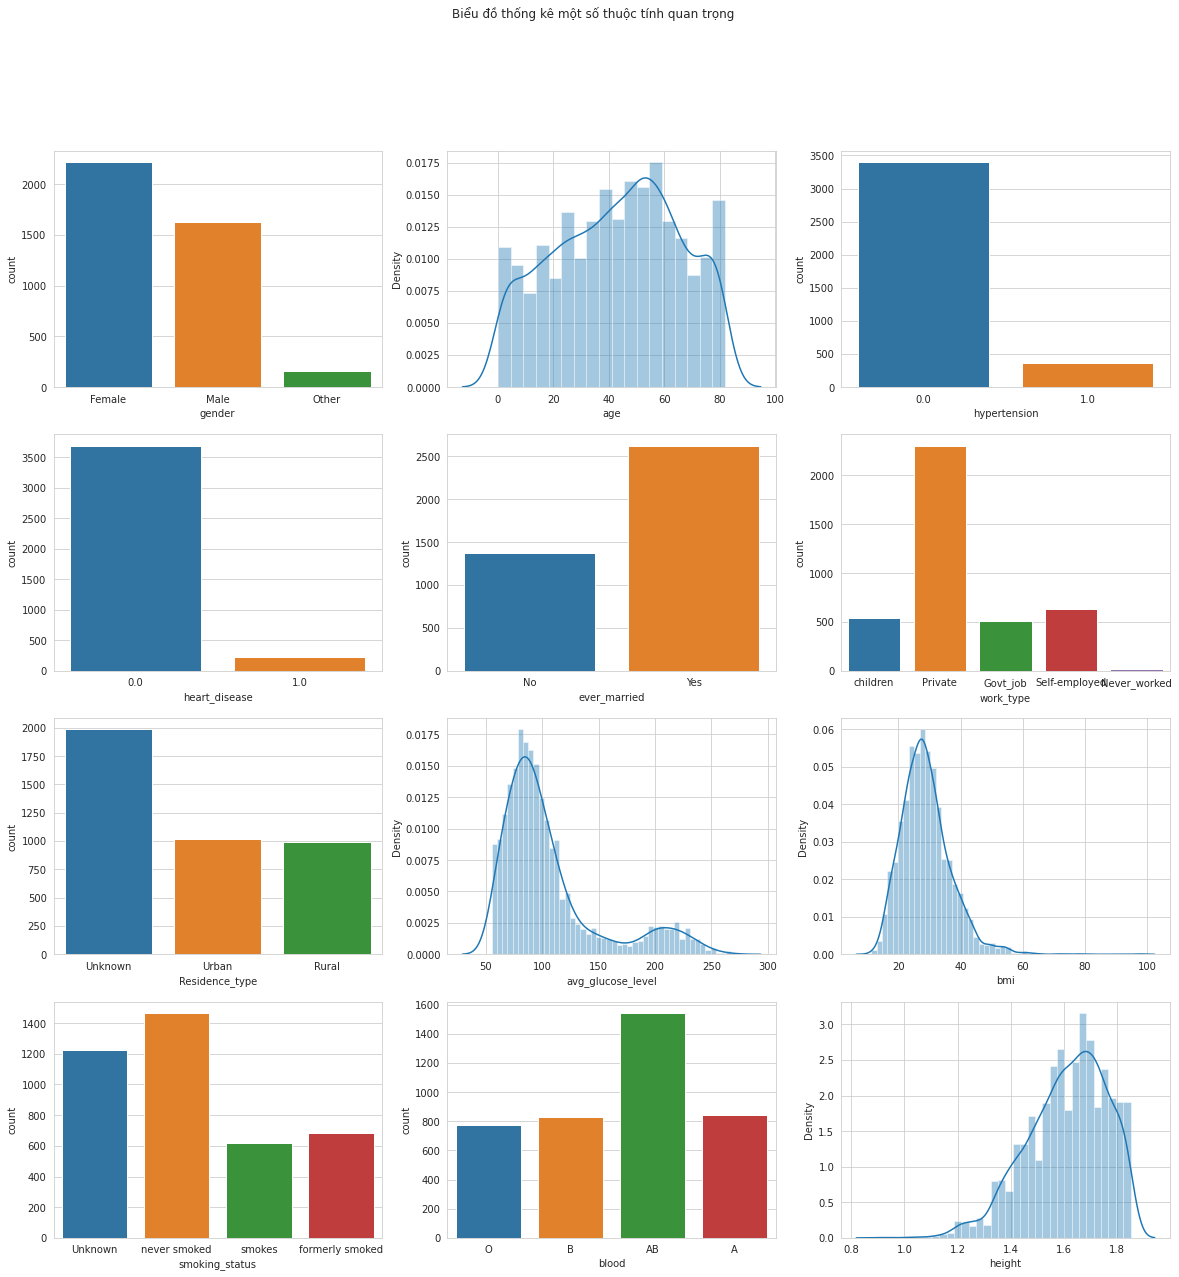

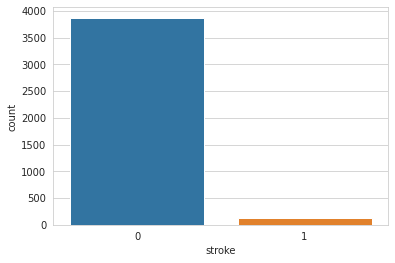

In [19]:
# Import thư viện cần thiết
import matplotlib.pyplot as plt
import seaborn as sns

def Bieu_do_thong_ke(data):
# Tạo một bảng chứa các biểu đồ
  fig,axes = plt.subplots(4,3,figsize = (20,20))
  sns.set_style('whitegrid')
  fig.suptitle("Biểu đồ thống kê một số thuộc tính quan trọng")
  sns.countplot(ax=axes[0,0],data=data,x='gender')
  sns.distplot(a=data['age'], ax=axes[0,1],hist= True)
  sns.countplot(ax=axes[0,2],data=data,x='hypertension')

  sns.countplot(ax=axes[1,0],data=data,x='heart_disease')
  sns.countplot(ax=axes[1,1],data=data,x='ever_married')
  sns.countplot(ax=axes[1,2],data=data,x='work_type')

  sns.countplot(ax=axes[2,0],data=data,x='Residence_type')
  sns.distplot(a=data['avg_glucose_level'], ax=axes[2,1],hist= True)
  sns.distplot(a=data['bmi'], ax=axes[2,2],hist= True)

  sns.countplot(ax=axes[3,0],data=data,x='smoking_status')
  sns.countplot(ax=axes[3,1],data=data,x='blood')
  sns.distplot(a=data['height'], ax=axes[3,2],hist= True)

  plt.show()
  sns.countplot(x='stroke', data=train)

#Biểu đồ thống kê tập train
Bieu_do_thong_ke(train)

**Nhận xét**: Nhìn chung data mới vô khi nào cũng rất chi là khoai, các giá trị phân bố không đều, bị lệch nhiều. Riêng với bộ data này, nhãn bị lệch thiên về 0.

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function 

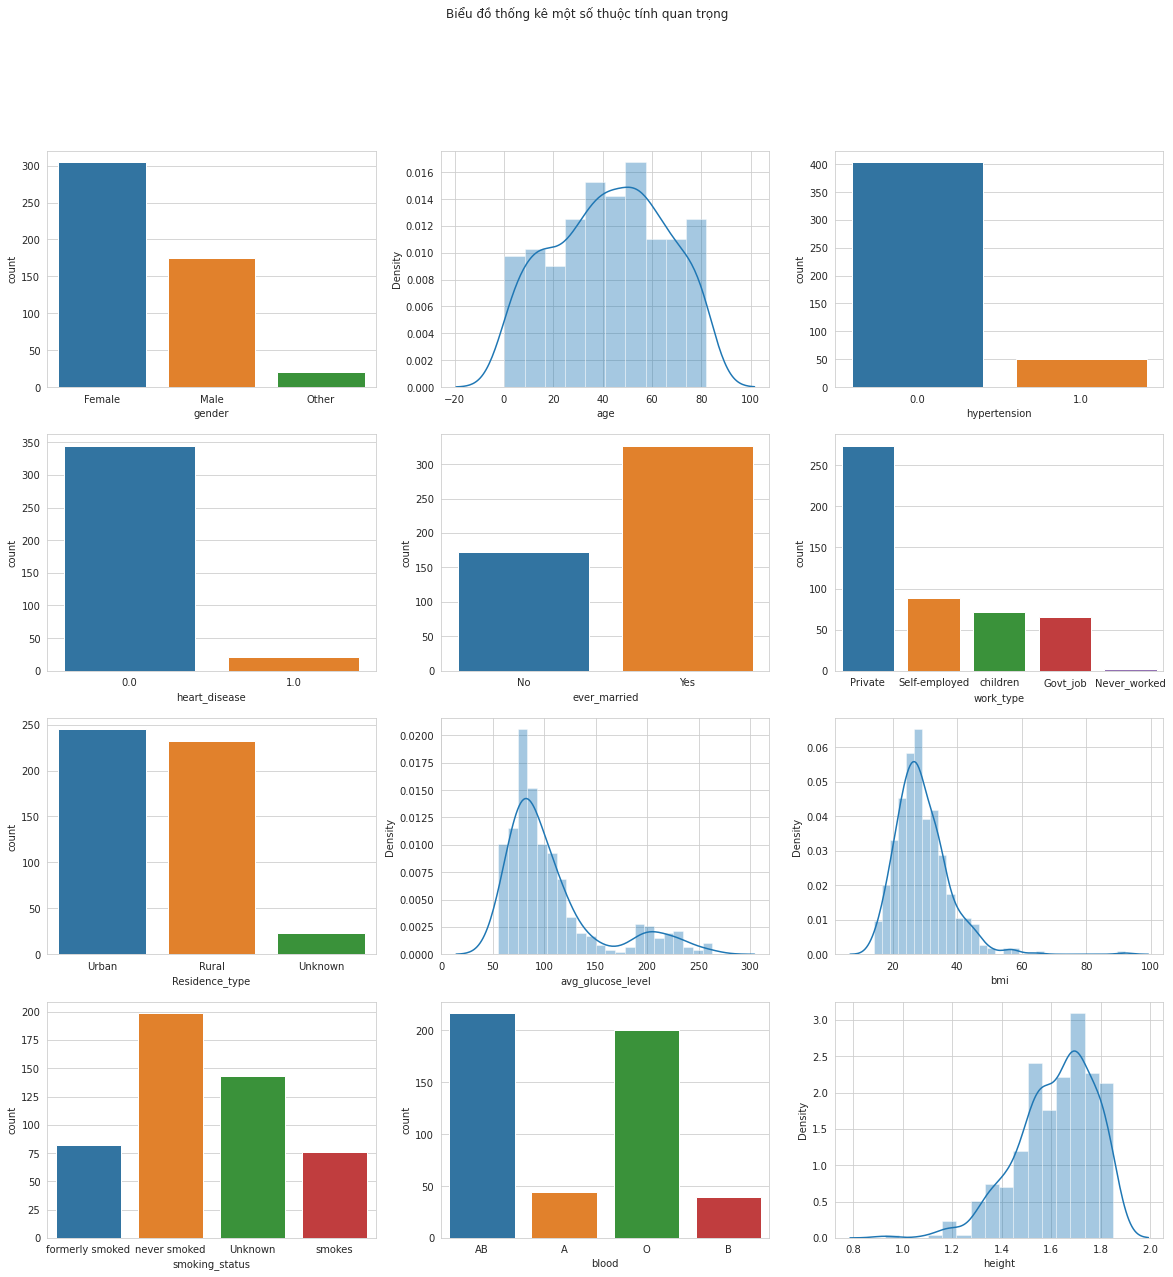

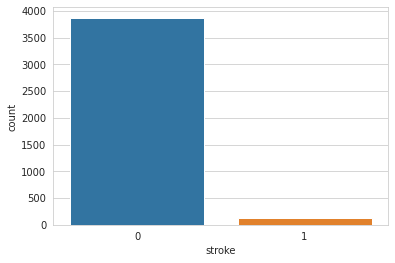

In [20]:
#Biểu đồ thống kê tập test
Bieu_do_thong_ke(test)

#### Tiền xử lý Data
Sau khi xong công đoạn tìm hiểu, chúng ta sẽ tiến đến giai đoạn "xử lý" em nó. Bằng cách nào nhỉ? Kéo xuống để tìm hiểu thêm!

##### Xóa cột id

In [21]:
train = train.drop(['id'], axis=1)
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4000 entries, 0 to 3999
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   gender             4000 non-null   object 
 1   age                3893 non-null   float64
 2   hypertension       3770 non-null   float64
 3   heart_disease      3910 non-null   float64
 4   ever_married       4000 non-null   object 
 5   work_type          4000 non-null   object 
 6   Residence_type     4000 non-null   object 
 7   avg_glucose_level  3829 non-null   float64
 8   bmi                2884 non-null   float64
 9   smoking_status     4000 non-null   object 
 10  blood              3990 non-null   object 
 11  height             2928 non-null   float64
 12  stroke             4000 non-null   int64  
dtypes: float64(6), int64(1), object(6)
memory usage: 406.4+ KB


##### Thống kê các dữ liệu bị mất 

In [22]:
def draw_missing_data_table(data):
    total = data.isnull().sum().sort_values(ascending=False)
    percent = (data.isnull().sum()/data.isnull().count()).sort_values(ascending=False)
    missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
    return missing_data
draw_missing_data_table(train)

,Total,Percent
bmi,1116,0.27900
height,1072,0.26800
hypertension,230,0.05750
avg_glucose_level,171,0.04275
age,107,0.02675
heart_disease,90,0.02250
blood,10,0.00250
stroke,0,0.00000
smoking_status,0,0.00000
Residence_type,0,0.00000


**Nhận xét :** Theo quan sát thì ta có thể thấy có 7 thuộc tính bị mất
  * **bmi**: Chỉ số BMI - Dạng số - Liên tục.
  * **height**: Chiều cao bệnh nhân - Dạng số - Liên tục
  * **hypertension**: Tiền sử về cao huyết áp - Dạng số - nhị phân.
  * **avg_glucose_level**: Lượng glucose trung bình có trong người - Dạng số - Liên tục
  * **age**: Tuổi bệnh nhân - Dạng số - nhóm.
  * **heart_disease**: Tiền sử bệnh tim - Dạng số - nhị phân.
  * **blood**: Nhóm máu của bệnh nhân - Dạng string - nhóm

##### Xử lí dữ liệu bị mất

Quan sát thấy cột nhóm máu chỉ có 10 hàng dữ liệu bị thiếu ta có thể bỏ qua luôn cho dễ xử lí dữ liệu

In [23]:
train = train.dropna(subset=['blood'])

Quan sát thấy 2 cột heart_disease và hypertension đều có giá trị nhị phân (0,1) vì thế chúng em quyết định từ tập dữ liệu chuẩn (không bị mất dữ liệu) xây dựng 2 mô hình dự đoán cho các giá trị còn thiếu của 2 tập này

In [24]:
!git clone https://github.com/Hoangthang017/AI-TEMPO-StrokePrediction.git

fatal: destination path 'AI-TEMPO-StrokePrediction' already exists and is not an empty directory.


In [25]:
import sys
sys.path.append('/content/AI-TEMPO-StrokePrediction/model/predict_missing_data/')

def predict_missing_data(data,type_data):
  # load model đã được train
  if type_data == 'heart_disease':
    model = pickle.load(open("/content/AI-TEMPO-StrokePrediction/model/predict_missing_data/LR_heart_disease.sav", 'rb'))
  else :
    model = model_DT_hypertension =pickle.load(open("/content/AI-TEMPO-StrokePrediction/model/predict_missing_data/DT_hypertension.sav", 'rb'))
  
  # chuẩn hóa dữ liêu cần dự đoán 
  X_test = fit_input.fit_input(data[data[type_data].isna()],type_data)
  predicted = model.predict(X_test)
    
  # đưa dữ liệu đã dự đoán vào lại tập gốc
  for i, idx in enumerate(data[type_data].index[data[type_data].apply(np.isnan)]):
    data[type_data].loc[idx] = predicted[i]
    
  return data

Xử lí dữ liệu các cột có giá trị liên tục bằng knn và các giá trị nhị phân bằng model 

In [ ]:
from fancyimpute import IterativeImputer, KNN, MatrixFactorization
from sklearn import preprocessing
import numpy as np
import pickle
import fit_input

def preprocessing_missing_data(data,test_data = False):
  # lấy các cột dữ liêu bị mất 
  missing_data_columns = ["avg_glucose_level", "age" ,"bmi","height","stroke"]
  if (test_data):
    missing_data_columns = missing_data_columns[:-1]
  
  missing_data = data.copy()[missing_data_columns]

  # gọi knn class
  imputer = KNN(k=2)

  # đặt dữ liệu bị mất 
  df = pd.DataFrame(imputer.fit_transform(missing_data), columns = missing_data_columns)

  # làm tròn dữ liệu 
  df[['age']] = df[['age']].round(0)
  df[['avg_glucose_level','bmi','heigt']] = df[['avg_glucose_level','bmi','height']].round(2)

  # thay thế dữ liệu đã xử lí vào bộ train
  for key in missing_data_columns:
    data[key] = np.where(data[key] == np.nan, data[key], df[key])

  # data['bmi'] = data['bmi'].fillna(round(data['bmi'].median(), 2))
  # data['height'] = data['height'].fillna(round(data['height'].median(), 2))

  # dự đoán dữ liệu của cột heart_disease và hypertension
  if (data.isnull().values.any()):
    data = predict_missing_data(data,'heart_disease')
    data = predict_missing_data(data,'hypertension')

  data = data.fillna(0)
  return data
train = preprocessing_missing_data(train)
train

##### Định dạng lại dữ liệu liên tục bằng cách chia các khoảng

In [27]:
def convert_data(data):
  data_temp = data.copy()
  data_temp['bmi_cat'] = pd.cut(data_temp['bmi'], bins = [-1000, 19, 25,30,10000], labels = ['Underweight', 'Ideal', 'Overweight', 'Obesity'])
  data_temp['age_cat'] = pd.cut(data_temp['age'], bins = [-500,13,18, 45,60,500], labels = ['Children', 'Teens', 'Adults','MidAdults','Elderly'])
  data_temp['glucose_cat'] = pd.cut(data_temp['avg_glucose_level'], bins = [-5000,90,160,230,5000], labels = ['Low', 'Normal', 'High', 'Very High'])
  data['age'] = data_temp['age_cat'].values
  data['bmi'] = data_temp['bmi_cat'].values
  data["avg_glucose_level"] = data_temp['glucose_cat'].values
  return data

##### Encode nhãn 

In [28]:
from sklearn.preprocessing import (StandardScaler, LabelEncoder)

def preprocessing_endcode_label(data, test_data = False):
  data = convert_data(data)

  ## mã hóa nhãn của các đối tượng phân loại theo thứ tự
  for col in ['gender','ever_married','work_type','Residence_type', 'smoking_status','blood','bmi','avg_glucose_level','age']:
    data[col] = LabelEncoder().fit_transform(data[col])

  return data

train = preprocessing_endcode_label(train)
train

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,blood,height,stroke
0,0,0,0.0,0.0,0,4,1,1,3,0,3,1.579016,0.0
1,1,3,0.0,0.0,1,2,2,1,2,2,2,1.590000,0.0
2,0,0,0.0,0.0,0,2,1,2,3,2,2,1.720206,0.0
3,0,0,0.0,0.0,0,2,2,2,1,0,3,1.240000,0.0
4,0,0,0.0,0.0,1,2,1,2,2,0,3,1.705000,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3995,1,4,0.0,0.0,0,2,1,2,0,0,2,1.845582,0.0
3996,1,3,0.0,0.0,1,2,0,1,0,1,2,1.790000,0.0
3997,2,3,1.0,0.0,1,2,0,2,1,3,1,1.150000,0.0
3998,0,0,0.0,0.0,1,2,1,0,1,1,3,1.330000,0.0


### Huấn luyện mô hình
Vậy là đã xong bước xử lý data, giờ là lúc chúng ta huấn luyện để cho ra một em model ngoan ngoãn vâng lời, biết giải quyết bài toán mình đặt ra.

In [ ]:
# Chọn những cột đặc trưng
features_columns = train.keys()
features_columns = features_columns.drop(['stroke','Residence_type'])
print(features_columns)

Lấy dữ liệu train 

In [30]:
def get_Xy(data):  
  X = np.array(data[features_columns])

  y = data['stroke']
  return X, y

X_train, y_train = get_Xy(train)

preprocess test data

In [ ]:
test = preprocessing_missing_data(test,True)
test = preprocessing_endcode_label(test,True)
test_data =np.array(test[features_columns]) 
test_data

#### Fit mất cân bằng dữ liệu

Sử dụng hàm MOTE để cân bằng dữ liệu

In [32]:
#Import thư viện cần thiết
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler

print('Before OverSampling, counts of label 1: {}'.format(sum(y_train==1)))
print('Before OverSampling, counts of label 0: {} \n'.format(sum(y_train==0)))
sm = SMOTE(random_state=22, k_neighbors=3,)
X_train_res, y_train_res = sm.fit_resample(X_train,y_train.ravel())
print('After OverSampling, counts of label 1: {}'.format(sum(y_train_res == 1)))
print('After OverSampling, counts of label 0: {}'.format(sum(y_train_res == 0)))

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.neighbors.base module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.neighbors. Anything that cannot be imported from sklearn.neighbors is now part of the private API.
  warnings.warn(message, FutureWarning)


Before OverSampling, counts of label 1: 130
Before OverSampling, counts of label 0: 3860 

After OverSampling, counts of label 1: 3860
After OverSampling, counts of label 0: 3860


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


#### Lấy model từ thư viện Sklearn

import thư viện 

In [34]:
import xgboost as xgb
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import GridSearchCV

sử dụng model XGBoost để dự đoán cho mô hình

In [35]:
model =xgb.XGBClassifier(learning_rate =0.1, n_estimators=400, max_depth=5,
 min_child_weight=6, gamma=0, subsample=0.5, colsample_bytree=0.85, reg_alpha= 1,reg_lambda= 0.1,
 objective= 'binary:logistic', nthread=4, scale_pos_weight=1, seed=27)
model.fit(X_train_res, y_train_res)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.85, gamma=0,
              learning_rate=0.1, max_delta_step=0, max_depth=5,
              min_child_weight=6, missing=None, n_estimators=400, n_jobs=1,
              nthread=4, objective='binary:logistic', random_state=0,
              reg_alpha=1, reg_lambda=0.1, scale_pos_weight=1, seed=27,
              silent=None, subsample=0.5, verbosity=1)

có thể sử dụng hàm GridSearchCV để tìm best parameter cho model

In [36]:
# param_test1 = {
#  'n_estimators': [350,400,450]
# }
# gsearch1 = GridSearchCV(estimator = xgb.XGBClassifier( learning_rate =0.1, n_estimators=400, max_depth=5,
#  min_child_weight=6, gamma=0, subsample=0.5, colsample_bytree=0.85, reg_alpha= 1,reg_lambda= 0.1,
#  objective= 'binary:logistic', nthread=4, scale_pos_weight=1, seed=27), 
#  param_grid = param_test1, scoring='roc_auc',n_jobs=4,iid=False, cv=5)
# gsearch1.fit(X_train_res,y_train_res)
# # gsearch1.best_params_

predict kết quả

In [37]:
y_pred = model.predict(test_data)

### Giảm chiều dữ liệu bằng PCA

### Submit

In [38]:

# submit = pd.DataFrame(zip(test.id, y_pred), columns=['id', 'stroke'])
# import math, requests
# ## Thay token bằng token của bạn nhé !
# def submit_prediction(df, sep=',', comment='', compression='gzip', **kwargs):
#     TOKEN=''
#     URL='http://submission.mmlab.uit.edu.vn/api/submissions'
#     df.to_csv('temporary.dat', sep=sep, compression=compression, **kwargs)
#     r = requests.post(URL, headers={'Authorization': 'Bearer {}'.format(TOKEN)},files={'datafile': open('temporary.dat', 'rb')},data={'comment':comment, 'compression': compression})
#     if r.status_code == 429:
#         raise Exception('Submissions are too close. Next submission is only allowed in {} seconds.'.format(int(math.ceil(int(r.headers['x-rate-limit-remaining']) / 1000.0))))
#     if r.status_code != 200:
#         raise Exception(r.text)
              
# submit_prediction(submit, sep=',', index=True, comment='svm')

In [39]:
submit = pd.DataFrame(zip(test.id, y_pred), columns=['id', 'stroke'])
submit.to_csv('submit_v13_under.csv')

In [40]:
submit['stroke'].value_counts()

0.0    448
1.0     52
Name: stroke, dtype: int64